## Yield Analysis

In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns 
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
from sklearn.cluster import KMeans as km
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso as LS
from sklearn.linear_model import Ridge as RG
from sklearn.tree import DecisionTreeRegressor as scart
from sklearn.manifold import TSNE
%matplotlib inline
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams["axes.edgecolor"] = "0.15"

In [2]:
# for visualisation
import chart_studio.plotly as py
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

### Loading and cleaning data

In [3]:
df=pd.read_excel("1997-2018_bihar_produce.xlsx")

In [4]:
df_rain=pd.read_excel("rain_fall_cleaned.xlsx")

In [5]:
df

,District,Year,Production,CROP TYPE,Area,Season
0,ARARIA,1997,426,Arhar/Tur,354.0,Kharif
1,ARARIA,1998,822,Arhar/Tur,546.0,Kharif
2,ARARIA,1999,1225,Arhar/Tur,973.0,Kharif
3,ARARIA,2000,2826,Arhar/Tur,2829.0,Kharif
4,ARARIA,2001,677,Arhar/Tur,483.0,Kharif
...,...,...,...,...,...,...
22499,VAISHALI,2015,75820,Wheat,40882.0,Rabi
22500,VAISHALI,2016,143464,Wheat,43138.0,Rabi
22501,VAISHALI,2017,132665,Wheat,40747.0,Rabi
22502,VAISHALI,2018,112717,Wheat,40704.0,Rabi


In [6]:
df=df[~df['District'].isin(['Total- Bajra', 'Banana', 'BHABUA)', 'Total- Banana', 'Barley',
       'seed', 'Coriander', 'lint)', 'chillies', 'Garlic', 'Ginger',
       'Gram', 'Groundnut', 'gram', 'Jowar', 'Jute', 'Khesari', 'Linseed',
       'Maize', 'Masoor', 'Mesta', 'Gram)', 'Onion', 'pulses', 'Pulses)',
       'Potato', 'Ragi', '&Mustard', 'Rice', 'Safflower', 'Sannhamp',
       'Sesamum', 'millets', 'Sugarcane', 'Sunflower', 'potato',
       'Tobacco', 'Turmeric', 'Urad', 'Wheat'])]
df=df[~df['District'].isin(['CHATRA','HAZARIBAGH','LOHARDAGA','SARAN'])]
df=df[~df['Season'].isin(['Total'])]

In [7]:
df['Area'].fillna(0)
df['Area']=df['Area'].astype(int)

In [8]:
df['Production']=df['Production'].fillna(0)
df['Production']=df['Production'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19285 entries, 0 to 22502
Data columns (total 6 columns):
District      19285 non-null object
Year          19285 non-null int64
Production    19285 non-null int32
CROP TYPE     19285 non-null object
Area          19285 non-null int32
Season        19285 non-null object
dtypes: int32(2), int64(1), object(3)
memory usage: 904.0+ KB


In [10]:
df

,District,Year,Production,CROP TYPE,Area,Season
0,ARARIA,1997,426,Arhar/Tur,354,Kharif
1,ARARIA,1998,822,Arhar/Tur,546,Kharif
2,ARARIA,1999,1225,Arhar/Tur,973,Kharif
3,ARARIA,2000,2826,Arhar/Tur,2829,Kharif
4,ARARIA,2001,677,Arhar/Tur,483,Kharif
...,...,...,...,...,...,...
22498,VAISHALI,2014,93816,Wheat,44811,Rabi
22499,VAISHALI,2015,75820,Wheat,40882,Rabi
22500,VAISHALI,2016,143464,Wheat,43138,Rabi
22501,VAISHALI,2017,132665,Wheat,40747,Rabi


In [11]:
df_copy=df

In [12]:
df['District'].unique()

array(['ARARIA', 'AURANGABAD', 'BEGUSARAI', 'BHAGALPUR', 'BHOJPUR',
       'DARBHANGA', 'GAYA', 'GOPALGANJ', 'JAMUI', 'JEHANABAD', 'KATIHAR',
       'KHAGARIA', 'KISHANGANJ', 'LAKHISARAI', 'MADHEPURA', 'MADHUBANI',
       'MUNGER', 'MUZAFFARPUR', 'NALANDA', 'NAWADA', 'PATNA', 'ROHTAS',
       'SAHARSA', 'SAMASTIPUR', 'SHEIKHPURA', 'SITAMARHI', 'SIWAN',
       'SUPAUL', 'VAISHALI', 'CHAMPARAN', 'PURNIA'], dtype=object)

In [13]:
crops=df['CROP TYPE'].unique()

In [14]:
crops

array(['Arhar/Tur', 'bajra', 'banana', 'barley', 'castor seed',
       'coriander', 'cotton', 'dry chillies', 'garlic', 'ginger', 'gram',
       'groundnut', 'horse-gram', 'jowar', 'jute', 'khesari', 'lineseed',
       'maize', 'masoor', 'mesta', 'moong', 'onion', 'other Rabi pulses',
       'other Kharif pulses', 'Peas & beans (Pulses)', 'potato', 'ragi',
       'Rapeseed &Mustard', 'rice', 'safflower', 'Sannhamp', 'Sesamum',
       'Small millets', 'sugarcane', 'sunflower', 'Sweet potato',
       'tobacco', 'Turmeric', 'Urad', 'Wheat'], dtype=object)

In [15]:
overall=df.groupby(by='Year').sum().reset_index()


fig = go.Figure(data=[
    go.Bar(name='Production in Tonnes', x=overall['Year'], y=overall['Production'],text=overall['Production']),
    go.Bar(name='Area', x=overall['Year'], y=overall['Area'],text=overall['Area'])
])
# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Production stats throughout years',width=1000, height=600)
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()


In [16]:
temp=df.groupby(by=['District','Year']).sum().reset_index()
fig = px.line(temp, x='Year', y="Production", color="District",
                  line_group="District", hover_name="District")
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.update_layout(xaxis_tickangle=-45,title='Major production of crops in Bihar',width=1200, height=750)
fig.show()

# fig.write_image("plots/production.png")

In [17]:
temp=df.groupby(by=['CROP TYPE','Year']).sum().reset_index()
temp=temp[temp['Production']>600000]

fig = px.line(temp, x="Year", y="Production", color="CROP TYPE",
              line_group="CROP TYPE", hover_name="CROP TYPE")
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.update_layout(xaxis_tickangle=-45,title='Major production of crops in Bihar')
fig.show()

In [18]:
# Total crops produced in bihar
df.groupby(by='CROP TYPE').sum().drop(['Area','Year'],axis=1).iplot(kind="bar",xTitle="Crops",yTitle="production",title="Total production of crops over the year(1997-2018) in BIHAR ",showgrid=False,mode="lines+markers")

In [19]:
# # Finding max crop in distrcits

# max_crop = df[['District','Year','CROP TYPE','Production']]
# max_crop = max_crop.groupby(['District','CROP TYPE']).agg('sum').reset_index()
# max_crop.drop(columns='Year',inplace=True)
# idx = max_crop.groupby(['CROP TYPE'])['Production'].transform(max) == max_crop['Production']
# max_crop=max_crop[idx].transpose().reset_index(level=0)
# max_crop
# max_crop.columns = max_crop.iloc[0]
# max_crop=max_crop.drop(0)
# max_crop=max_crop.reset_index(drop=True)
# max_crop=max_crop.T.groupby(level=0).agg(','.join)
# max_crop.to_csv('max_crop.csv')

#### Finding the Districts with maximum production for each Crops

In [20]:
max_crop_dist=pd.read_csv('max_crop.csv')

fig = go.Figure(data=[go.Table(
    header=dict(values=['Crops','Leading Districts'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[max_crop_dist['CROP TYPE'], # 1st column
                       max_crop_dist['District']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
],)

fig.update_layout(width=700, height=800,title='Leading producers of Crops')
fig.show()



#### Finding the crops with maximum production in each district

In [21]:
max_crop = df[['District','Year','CROP TYPE','Production']]
max_crop = max_crop.groupby(['District','CROP TYPE']).agg('sum').reset_index()
max_crop.drop(columns='Year',inplace=True)
idx = max_crop.groupby(['District'])['Production'].transform(max) == max_crop['Production']
max_crop=max_crop[idx]

fig = go.Figure(data=[go.Table(
    header=dict(values=['District','Major Produced Crop','Production \n (Tonnes)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[max_crop['District'],# 1st column
                    max_crop['CROP TYPE'],max_crop['Production']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
],)

fig.update_layout(width=500, height=900,title='Crops with maximum production in each district')
fig.show()


#### Maximum produced crops in districts year wise

In [22]:
max_crop_yearly = df.groupby('District').agg('mean').reset_index()
max_crop_yearly = max_crop_yearly[['District']]
for i in df.Year.unique():
    max_crop = df[['District','Year','CROP TYPE','Production']]
    max_crop = max_crop[max_crop.Year==i]
    max_crop = max_crop.groupby(['District','CROP TYPE']).agg('sum').reset_index()
    max_crop.drop(columns='Year',inplace=True)
    idx = max_crop.groupby(['District'])['Production'].transform(max) == max_crop['Production']
    max_crop_yearly = pd.merge(max_crop_yearly,max_crop[idx][['District','CROP TYPE']].reset_index(),how='left')
    max_crop_yearly.drop(columns= {'index'},inplace=True)
    max_crop_yearly.rename(columns={'CROP TYPE':i},inplace=True)

max_crop_yearly

,District,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2016,2015,2017,2018
0,ARARIA,jute,jute,jute,jute,jute,jute,jute,jute,jute,...,jute,jute,jute,rice,rice,rice,maize,rice,rice,maize
1,AURANGABAD,rice,rice,Wheat,rice,rice,rice,rice,rice,rice,...,rice,rice,rice,rice,rice,rice,rice,rice,rice,rice
2,BEGUSARAI,banana,banana,banana,banana,banana,banana,banana,banana,banana,...,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur,Arhar/Tur
3,BHAGALPUR,sugarcane,Wheat,Wheat,Wheat,sugarcane,sugarcane,sugarcane,maize,maize,...,Wheat,sugarcane,Wheat,sugarcane,Wheat,sugarcane,Wheat,sugarcane,Wheat,Wheat
4,BHOJPUR,rice,rice,Wheat,rice,rice,rice,rice,Wheat,rice,...,Wheat,rice,rice,rice,rice,rice,rice,rice,rice,Wheat
5,CHAMPARAN,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,...,sugarcane,sugarcane,rice,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane
6,DARBHANGA,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,rice,Wheat,rice,...,Wheat,Wheat,Wheat,Wheat,Wheat,rice,Wheat,Wheat,Wheat,Wheat
7,GAYA,rice,rice,Wheat,rice,rice,rice,rice,Wheat,Wheat,...,Wheat,Wheat,rice,rice,rice,rice,rice,rice,rice,Wheat
8,GOPALGANJ,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,...,sugarcane,sugarcane,Wheat,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane,sugarcane
9,JAMUI,rice,rice,Wheat,rice,sugarcane,rice,rice,sugarcane,rice,...,rice,sugarcane,rice,rice,rice,rice,rice,rice,rice,Wheat


In [23]:
# classification of kharif and rabi type crops

df_kharif_data=df[df['Season']=='Kharif'].groupby(by='CROP TYPE').sum().drop(['Area','Year'],axis=1).reset_index()
df_rabi_data=df[df['Season']=='Rabi'].groupby(by='CROP TYPE').sum().drop(['Area','Year'],axis=1).reset_index()

df_kharif_data=df_kharif_data.sort_values(by=['Production'], ascending = False)
df_rabi_data=df_rabi_data.sort_values(by=['Production'], ascending = False)


fig = go.Figure(data=[go.Table(
    header=dict(values=['Crops','Production(Tonnes)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[df_kharif_data['CROP TYPE'],# 1st column
                    df_kharif_data['Production']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
],)

fig.update_layout(width=450, height=700,title='Kharif Crops cultivated in Bihar')
fig.show()




In [24]:

fig = go.Figure(data=[go.Table(
    header=dict(values=['Crops','Production(Tonnes)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[df_rabi_data['CROP TYPE'],# 1st column
                    df_rabi_data['Production']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
],)

fig.update_layout(width=450, height=600,title='Rabi Crops cultivated in Bihar')
fig.show()

In [25]:
# Production of Kharif & Rabi crops throughout years

df_kharif_data=df[df['Season']=='Kharif'].groupby(by='Year').sum().reset_index()
df_rabi_data=df[df['Season']=='Rabi'].groupby(by='Year').sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name='Kharif', x=df_kharif_data['Year'], y=df_kharif_data['Production'],text=df_kharif_data['Production']),
    go.Line(name='Kharif Area', x=df_kharif_data['Year'], y=df_kharif_data['Area']),
    go.Bar(name='Rabi', x=df_rabi_data['Year'], y=df_rabi_data['Production'],text=df_rabi_data['Production']),
    go.Line(name='Rabi Area', x=df_rabi_data['Year'], y=df_rabi_data['Area'])
])
# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Production of Kharif & Rabi crops throughout years',width=1000, height=600)
fig.update_traces(texttemplate='%{text:.3s}')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()


C:\hp\BIN\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [26]:
df_analysis_data=df.groupby(by='CROP TYPE').sum().drop(['Area','Year'],axis=1).reset_index()
df_analysis_data=df_analysis_data[df_analysis_data['Production']>=600000]
labels=list(df_analysis_data['CROP TYPE'])
values =list(df_analysis_data['Production'])
title='Distribution of crops Produced in Bihar from 1997-2018'
layout = go.Layout(
        title=title,
        height=800,width=1000,margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )],layout=layout)
fig.show()


C:\hp\BIN\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [27]:
df_analysis_data=df.groupby(by='CROP TYPE').sum().drop(['Year'],axis=1).reset_index()
df_analysis_data=df_analysis_data[df_analysis_data['Production']>600000]
labels=list(df_analysis_data['CROP TYPE'])
values =list(df_analysis_data['Area'])
title='Distribution of Crops sown in Bihar from 1997-2018'
layout = go.Layout(
        title=title,
        height=800,width=1000,margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )],layout=layout)
fig.show()


In [28]:
# Major crops produced in Bihar
major_Crop=df.groupby(by='CROP TYPE').sum().drop(['Area','Year'],axis=1).reset_index()
major_Crop=major_Crop[major_Crop['CROP TYPE'].isin(['Wheat','jute','maize','potato','rice','sugarcane'])]
major_Crop['Production']=major_Crop['Production']/22
major_Crop['Production']=major_Crop['Production'].astype(int)
labels=list(major_Crop['CROP TYPE'])
values =list(major_Crop['Production'])
title='Average Production of Major crops in Bihar'
layout = go.Layout(
        title=title,
        height=600,
        margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             insidetextorientation='radial'
                            )],layout=layout)

fig.show()

In [29]:
# Major crops produced in Bihar
major_Crop=df.groupby(by='CROP TYPE').sum().drop(['Year'],axis=1).reset_index()
major_Crop=major_Crop[major_Crop['CROP TYPE'].isin(['Wheat','jute','maize','potato','rice','sugarcane'])]
major_Crop['Area']=major_Crop['Area']/22
major_Crop['Area']=major_Crop['Area'].astype(int)
labels=list(major_Crop['CROP TYPE'])
values =list(major_Crop['Area'])
title='Average Area sown of Major crops in Bihar'
layout = go.Layout(
        title=title,
        height=600,
        margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             insidetextorientation='radial'
                            )],layout=layout)

fig.show()

In [30]:
# Yearwise Production of Major crops
df_yearwise_major_crops=df.groupby(by=['Year','CROP TYPE']).sum().reset_index()
df_yearwise_major_crops=df_yearwise_major_crops[df_yearwise_major_crops['CROP TYPE'].isin([ 'Wheat','maize','rice','sugarcane','potato','jute'])]
fig=px.bar(df_yearwise_major_crops,x='CROP TYPE',y='Year',color='Production',title='Yearwise production of Major crops within Bihar',text='Year',height=800)
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()


In [31]:
# Yearwise Sown Area of Major crops
df_yearwise_major_crops=df.groupby(by=['Year','CROP TYPE']).sum().reset_index()
df_yearwise_major_crops=df_yearwise_major_crops[df_yearwise_major_crops['CROP TYPE'].isin([ 'Wheat','maize','rice','sugarcane','potato','jute'])]
fig=px.bar(df_yearwise_major_crops,x='CROP TYPE',y='Year',color='Area',title='Yearwise sown area of Major crops within Bihar',text='Year',height=800)
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()


In [32]:
# Minor crops produced in Bihar
minor_Crop=df.groupby(by='CROP TYPE').sum().drop(['Area','Year'],axis=1).drop(['Wheat','jute','maize','potato','rice','sugarcane'],axis=0).reset_index()
# minor_Crop['Production'].mean()
minor_Crop=minor_Crop[minor_Crop['Production']>600000]
minor_Crop['Production']=minor_Crop['Production']/22
minor_Crop['Production']=minor_Crop['Production'].astype(int)
labels=list(minor_Crop['CROP TYPE'])
values =list(minor_Crop['Production'])
title='Minor crops Average Production in Bihar'
layout = go.Layout(
        title=title,
        height=600,
        margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             insidetextorientation='radial'
                            )],layout=layout)
fig.show()


In [33]:
minor_Crop['Production'].sum()

842833

In [34]:
# Minor crops Area sown in Bihar
minor_Crop=df.groupby(by='CROP TYPE').sum().drop(['Year'],axis=1).drop(['Wheat','jute','maize','potato','rice','sugarcane'],axis=0).reset_index()
# minor_Crop['Production'].mean()
minor_Crop=minor_Crop[minor_Crop['Production']>600000]
minor_Crop['Area']=minor_Crop['Area']/22
minor_Crop['Area']=minor_Crop['Area'].astype(int)
labels=list(minor_Crop['CROP TYPE'])
values =list(minor_Crop['Area'])
title='Minor crops Average Area sown in Bihar'
layout = go.Layout(
        title=title,
        height=600,
        margin=go.Margin(l=0, r=200, b=100, t=100, pad=4)  
        )
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             insidetextorientation='radial'
                            )],layout=layout)
fig.show()

In [35]:
# Yearwise Production of Minor crops
df_yearwise_minor_crops=df.groupby(by=['Year','CROP TYPE']).sum().reset_index()
df_yearwise_minor_crops=df_yearwise_minor_crops[df_yearwise_minor_crops['CROP TYPE'].isin(['Arhar/Tur','Rapeseed &Mustard','Sweet potato','banana','gram','khesari','masoor','mesta','moong','onion'])]
fig=px.bar(df_yearwise_minor_crops,x='CROP TYPE',y='Year',color='Production',title='Yearwise production of Minor crops within Bihar',text='Year',height=800)
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()

In [36]:
major_prod=df_yearwise_major_crops.groupby(by='Year').sum().reset_index()
minor_prod=df_yearwise_minor_crops.groupby(by='Year').sum().reset_index()
fig = go.Figure(data=[
    go.Bar(name='major', x=major_prod['Year'], y=major_prod['Production'],text=major_prod['Production']),
    go.Line(name='major Area', x=major_prod['Year'], y=major_prod['Area']),
     go.Bar(name='minor', x=minor_prod['Year'], y=minor_prod['Production'],text=minor_prod['Production']),
    go.Line(name='minor Area', x=minor_prod['Year'], y=minor_prod['Area']),
])
# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Production of Major & Minor crops throughout years',width=1000, height=600)
fig.update_traces(texttemplate='%{text:.3s}')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()


# Rainfall Analysis

In [37]:
temp=df_rain

# temp=temp.drop(['Production','Area','Avg rain','CROP TYPE','Season'],axis=1)

fig = px.line(temp, x='Year', y="Total rain", color="District",
                  line_group="District", hover_name="District")
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.update_layout(xaxis_tickangle=-45,title='Major production of crops in Bihar',width=1200, height=730)
fig.show()

# fig.write_image("plots/rainfall.png")


In [38]:
# pip install -U kaleido

In [39]:
# Inner Merge Rainfall data to make it main dataframe 
df_main=pd.merge(df.rename(columns={"District": "District", "Year": "Year"}),df_rain,how='inner')
df_main

,District,Year,Production,CROP TYPE,Area,Season,Avg rain,Total rain
0,ARARIA,1997,426,Arhar/Tur,354,Kharif,272,1770
1,ARARIA,1997,11611,banana,386,Whole Year,272,1770
2,ARARIA,1997,87,barley,84,Rabi,272,1770
3,ARARIA,1997,58,coriander,119,Whole Year,272,1770
4,ARARIA,1997,128,dry chillies,135,Whole Year,272,1770
...,...,...,...,...,...,...,...,...
17930,SAHARSA,2018,3,Sesamum,3,Kharif,102,669
17931,SAHARSA,2018,12129,sugarcane,135,Whole Year,102,669
17932,SAHARSA,2018,117,sunflower,82,Rabi,102,669
17933,SAHARSA,2018,223,Urad,252,Kharif,102,669


In [40]:
df_main['CROP TYPE'].nunique()

40

### Correlation plots

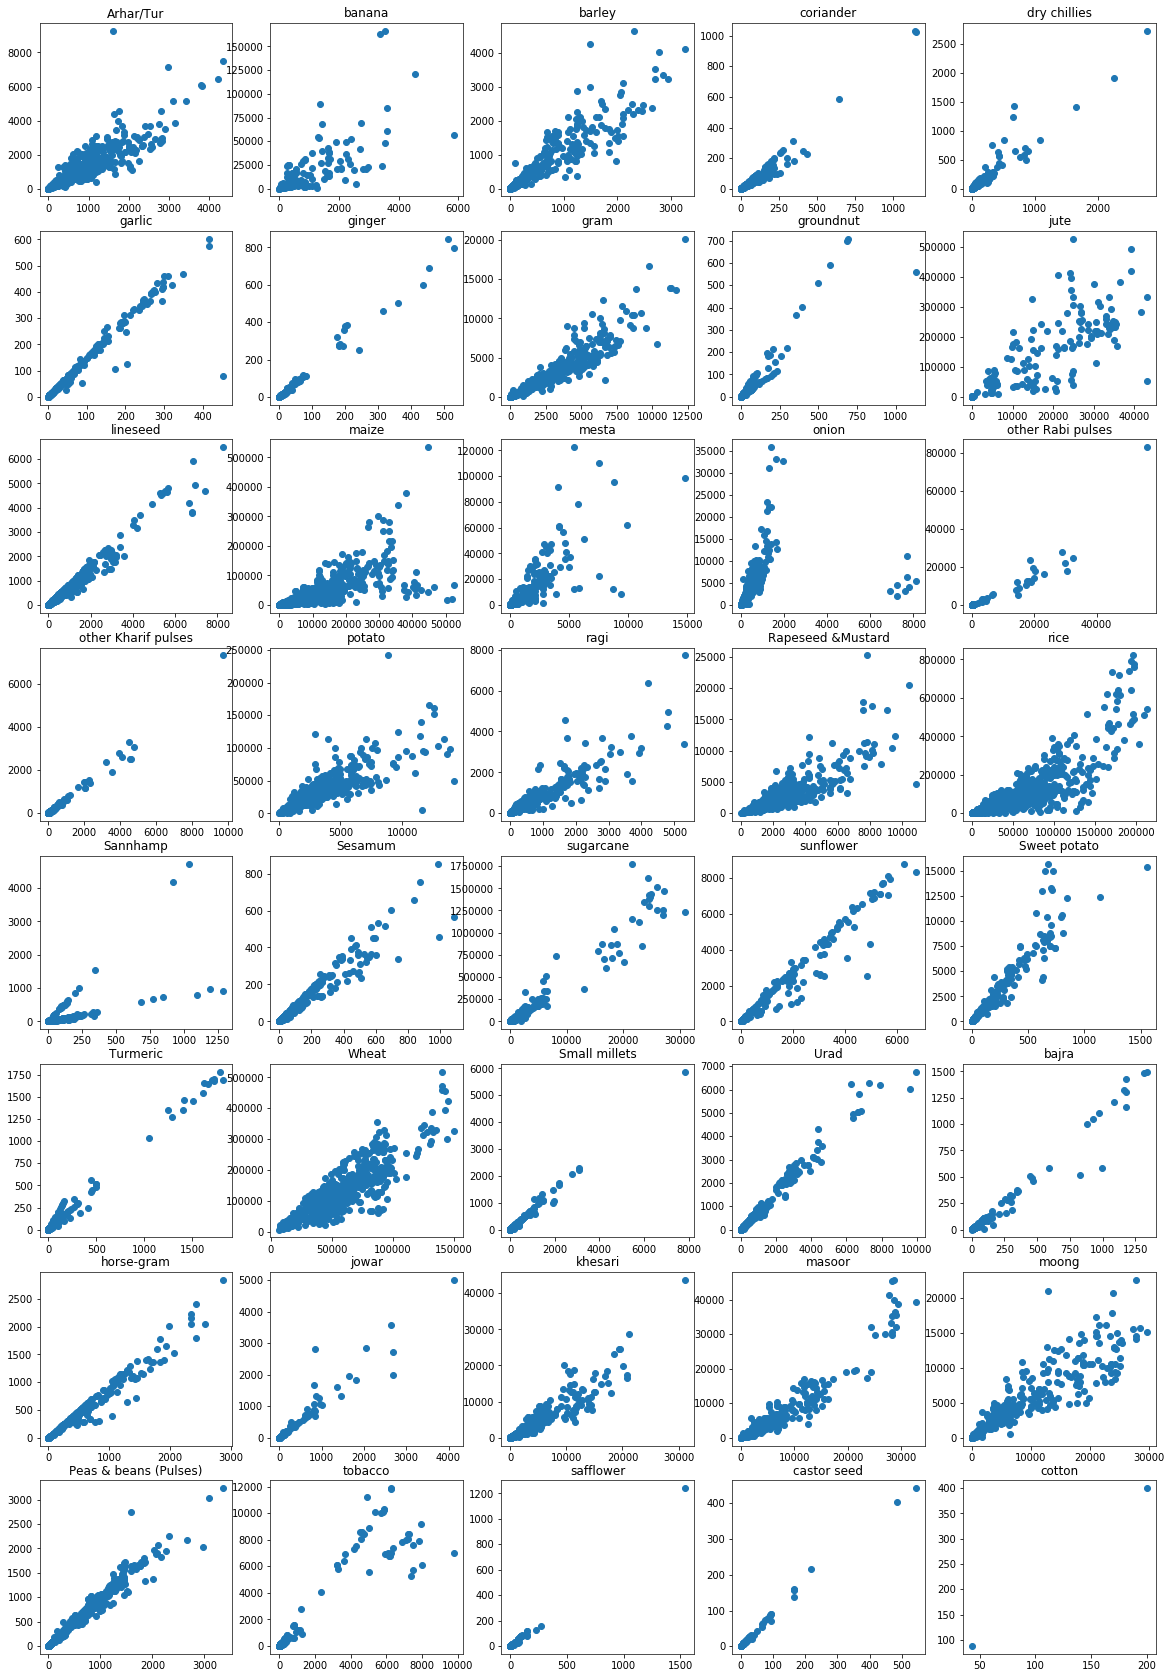

In [41]:
# Area vs Production crop-wise
ct = 1
fig = mplot.figure(figsize=(20,30))
for i in df_main['CROP TYPE'].unique():
    tp= df_main[df_main['CROP TYPE']==i]
    tp=tp.iloc[:,2:] 
    mplot.subplot(8,5,ct)
    mplot.scatter(tp.iloc[:,2],tp.iloc[:,0])
    mplot.title(i)
    ct+=1
mplot.show()

In [42]:
# code is minimized

# Area vs rainfall crop-wise
# ct = 1
# fig = mplot.figure(figsize=(20,30))
# for i in df_main['CROP TYPE'].unique():
#     tp= df_main[df_main['CROP TYPE']==i]
#     tp=tp.iloc[:,2:] 
#     mplot.subplot(8,5,ct)
#     mplot.scatter(tp.iloc[:,2],tp.iloc[:,5])
#     mplot.title(i)
#     ct+=1
# mplot.show()

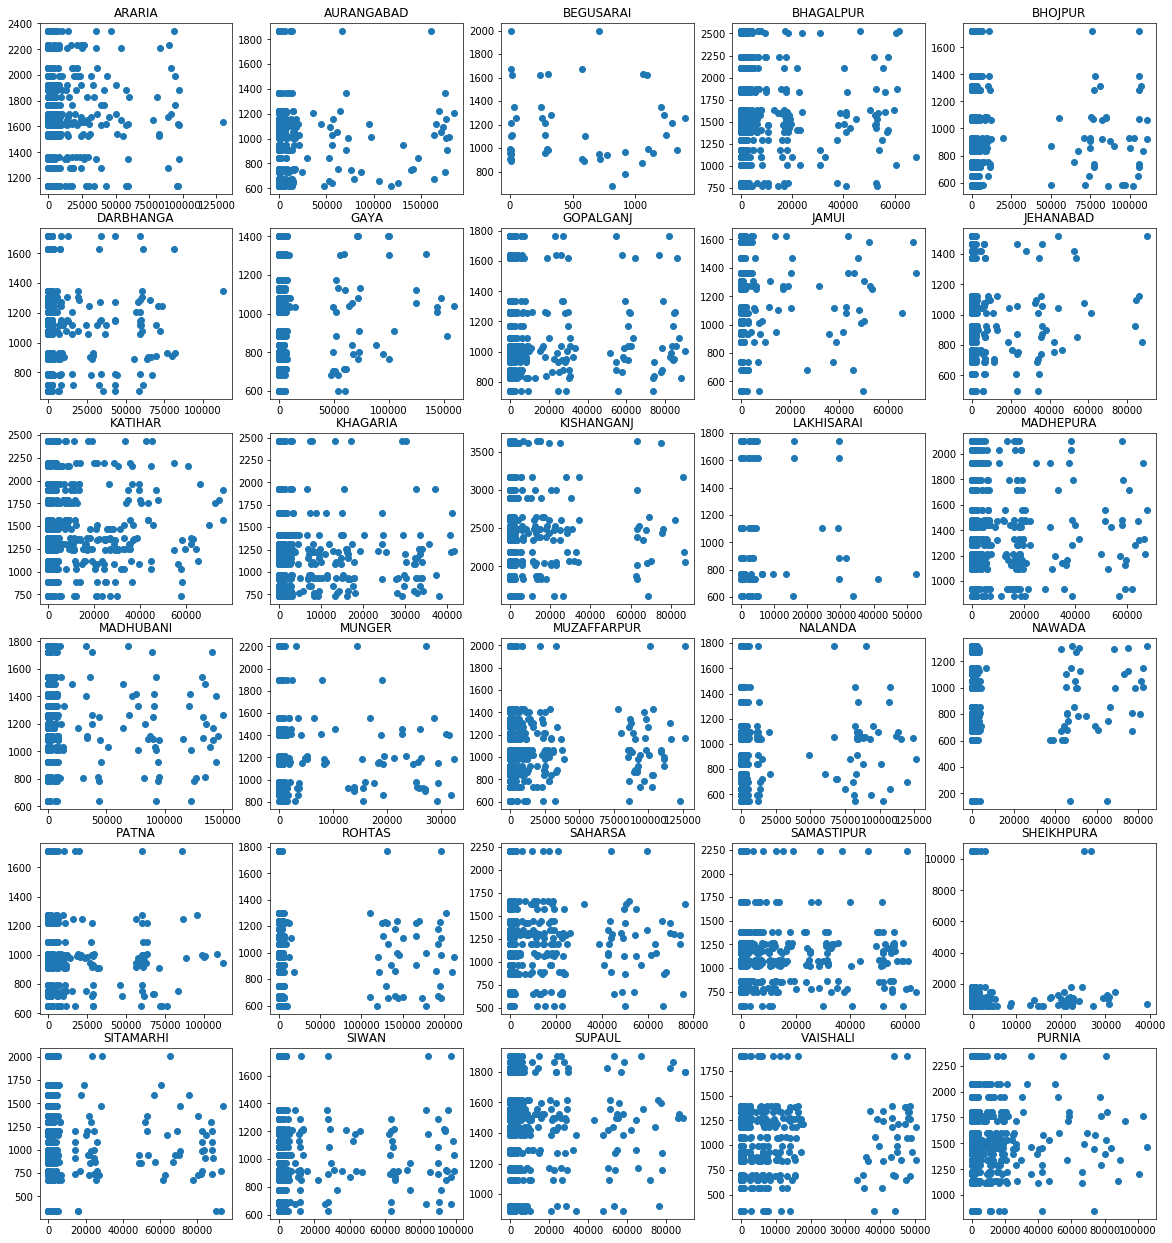

In [43]:
# Area vs rainfall District-wise
ct = 1
fig = mplot.figure(figsize=(20,22))
for i in df_main.District.unique():
    tp= df_main[df_main.District==i]
    tp=tp.iloc[:,2:] 
    mplot.subplot(6,5,ct)
    mplot.scatter(tp.iloc[:,2],tp.iloc[:,5])
    mplot.title(i)
    ct+=1
mplot.show()

In [44]:
# code is minimized

# production vs rainfall crop-wise
# ct = 1
# fig = mplot.figure(figsize=(20,30))
# for i in df_main['CROP TYPE'].unique():
#     tp= df_main[df_main['CROP TYPE']==i]
#     tp=tp.iloc[:,2:] 
#     mplot.subplot(8,5,ct)
#     mplot.scatter(tp.iloc[:,0],tp.iloc[:,5])
#     mplot.title(i)
#     ct+=1
# mplot.show()

In [45]:
# code is minimized

# # production vs rainfall Districtwise
# ct = 1
# fig = mplot.figure(figsize=(20,22))
# for i in df_main.District.unique():
#     tp= df_main[df_main.District==i]
#     tp=tp.iloc[:,2:] 
#     mplot.subplot(6,5,ct)
#     mplot.scatter(tp.iloc[:,0],tp.iloc[:,5])
#     mplot.title(i)
#     ct+=1
# mplot.show()



In [46]:
# code is minimized

# yield vs rainfall District-wise
# ct = 1
# fig = mplot.figure(figsize=(20,22))
# for i in df_main.District.unique():
#     tp= df_main[df_main.District==i]
#     tp=tp.iloc[:,2:] 
#     mplot.subplot(6,5,ct)
#     mplot.scatter(tp.iloc[:,0]/tp.iloc[:,2],tp.iloc[:,5])
#     mplot.title(i)
#     ct+=1
# mplot.show()



## Removing Outliers (IQR,Z-score) methods

### IQR (Inter Quartile Range)

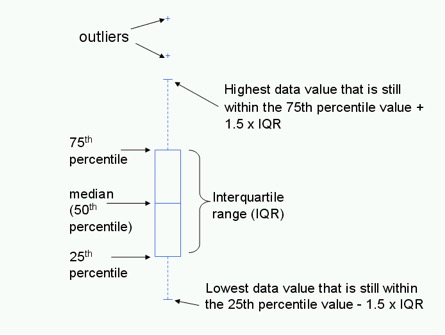

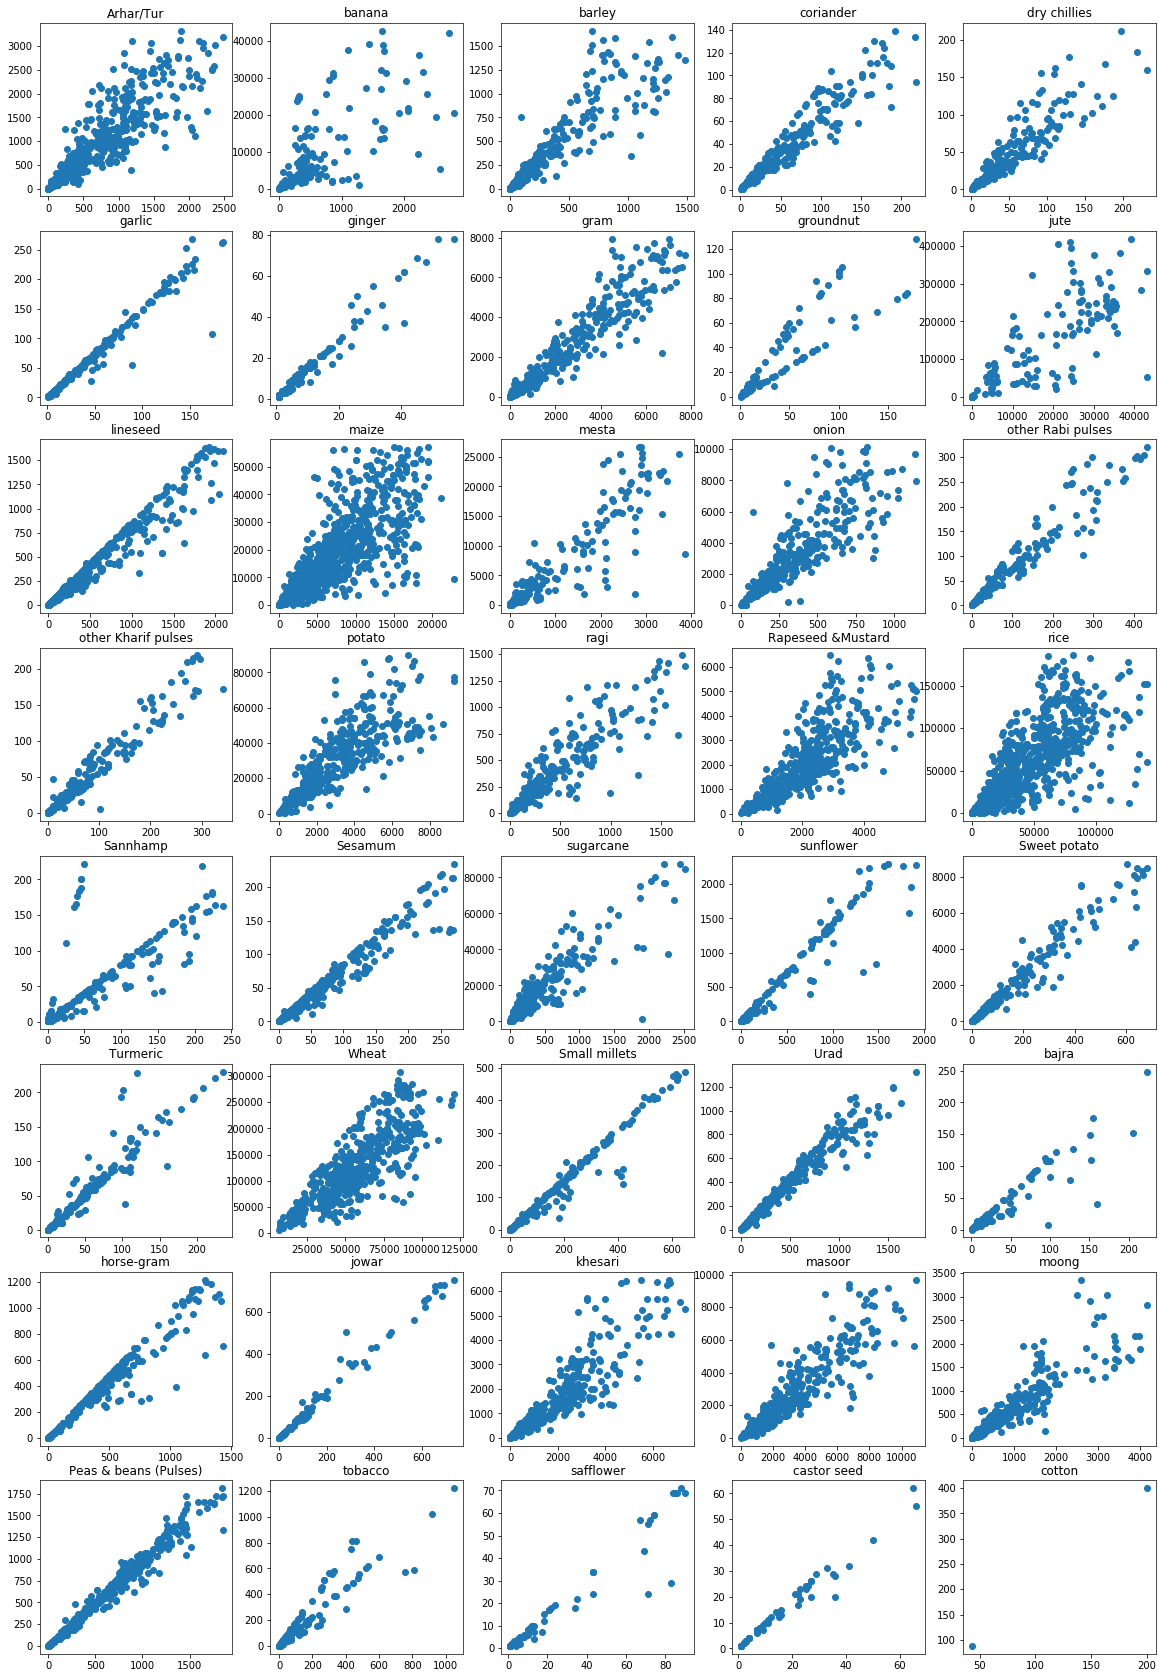

In [47]:
# Area vs production crop-wise
ct = 1
fig = mplot.figure(figsize=(20,30))
for i in df_main['CROP TYPE'].unique():
    x=[]
    x=df_main[df_main['CROP TYPE']==i].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)
    sorted(x)
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    x=x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
    mplot.subplot(8,5,ct)
    mplot.scatter(x['Area'],x['Production'])
    mplot.title(i)
    ct+=1
mplot.show()

In [48]:
# code is minimized

# Area vs rainfall crop-wise
# ct = 1
# fig = mplot.figure(figsize=(20,30))
# for i in df_main['CROP TYPE'].unique():
#     x=[]
#     x=df_main[df_main['CROP TYPE']==i].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)
#     sorted(x)
#     Q1=x.quantile(0.25)
#     Q3=x.quantile(0.75)
#     IQR=Q3-Q1
#     x=x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
#     mplot.subplot(8,5,ct)
#     mplot.scatter(x['Area'],x['Total rain'])
#     mplot.title(i)
#     ct+=1
# mplot.show()

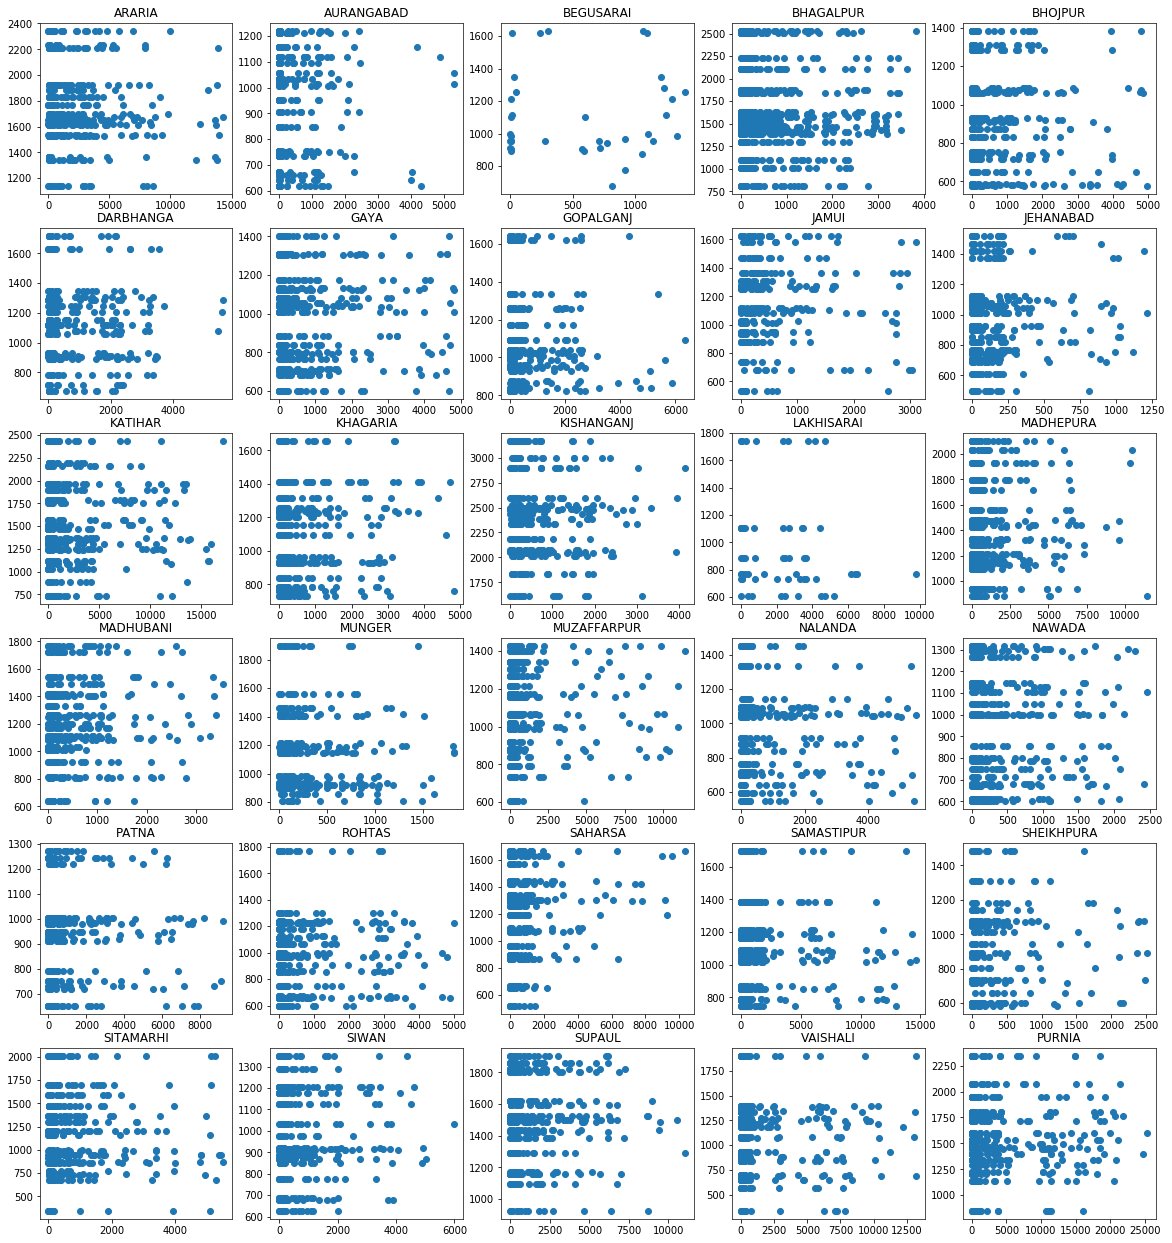

In [49]:
# Area vs rainfall District-wise
ct = 1
fig = mplot.figure(figsize=(20,22))
for i in df_main.District.unique():
    x=[]
    x=df_main[df_main.District==i].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)
    sorted(x)
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    x=x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
    mplot.subplot(6,5,ct)
    mplot.scatter(x['Area'],x['Total rain'])
    mplot.title(i)
    ct+=1
mplot.show()


In [50]:
# code is minimized

# production vs rainfall
# ct = 1
# fig = mplot.figure(figsize=(20,30))
# for i in df_main['CROP TYPE'].unique():
#     x=[]
#     x=df_main[df_main['CROP TYPE']==i].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)
#     sorted(x)
#     Q1=x.quantile(0.25)
#     Q3=x.quantile(0.75)
#     IQR=Q3-Q1
#     x=x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
#     mplot.subplot(8,5,ct)
#     mplot.scatter(x['Production'],x['Total rain'])
#     mplot.title(i)
#     ct+=1
# mplot.show()

In [51]:
# code is minimized

# production vs rainfall Distrct-wise
# ct = 1
# fig = mplot.figure(figsize=(20,22))
# for i in df_main.District.unique():
#     x=[]
#     x=df_main[df_main.District==i].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)
#     sorted(x)
#     Q1=x.quantile(0.25)
#     Q3=x.quantile(0.75)
#     IQR=Q3-Q1
#     x=x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
#     mplot.subplot(5,6,ct)
#     mplot.scatter(x['Production'],x['Total rain'])
#     mplot.title(i)
#     ct+=1
# mplot.show()



In [52]:
# code is minimized

# Yield vs rainfall District-wise
# ct = 1
# fig = mplot.figure(figsize=(20,22))
# for i in df_main.District.unique():
#     x=[]
#     x=df_main[df_main.District==i].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)
#     sorted(x)
#     Q1=x.quantile(0.25)
#     Q3=x.quantile(0.75)
#     IQR=Q3-Q1
#     x=x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
#     mplot.subplot(6,5,ct)
#     mplot.scatter(x['Production']/x['Area'],x['Total rain'])
#     mplot.title(i)
#     ct+=1
# mplot.show()


## Z-score

In [53]:
from scipy import stats

z = np.abs(stats.zscore(df_main[df_main.District=='JAMUI'].iloc[:,2:].drop(['CROP TYPE','Season'],axis=1)))
# print(z)
# z.mean()
threshold = 4
print(np.where(z > 4))

(array([125, 150, 214, 296, 315, 315, 334, 354, 393, 393, 395, 412, 412,
       414, 431, 431, 433], dtype=int64), array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64))


In [54]:
# jamui[(z < 1).all(axis=1)]

# MINOR CROPS ANALYSIS
## Arhar/Tur 

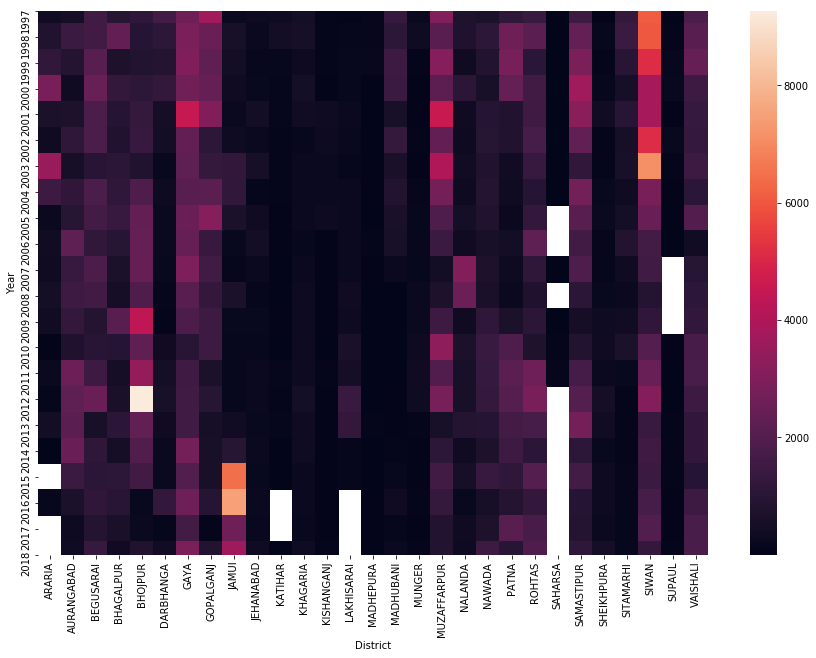

In [55]:
fig, ax = plt.subplots(figsize=(15,10)) 
df_pro=df[df['CROP TYPE']=='Arhar/Tur'].pivot_table(values='Production',index='Year',columns='District')
sns.heatmap(df_pro)


In [56]:
fig = px.bar(df[df['CROP TYPE']=='Arhar/Tur'], x="District", y="Year",
             color='Production',
             title="production of Arhar/Tur",
#              barmode='relative',
             height=900,width=1000,text='Year',
         
)
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)

fig.show()

In [57]:

df[df['CROP TYPE']=='Arhar/Tur'].groupby(by='District').sum().drop(['Year','Area'],axis=1).iplot(kind="bar",xTitle="district",yTitle="production",title="total production over the years(1997-2018) for Arhar/Tur",showgrid=False)


In [58]:
df_special_Arhar=df[df['CROP TYPE']=='Arhar/Tur'].loc[df['District'].isin(['SIWAN','MUZAFFARPUR','JAMUI','BHOJPUR'])]
# for i in ['SIWAN','MUZAFFARPUR','JAMUI','BHOJPUR']:
fig = px.bar(df_special_Arhar,x='Year',y='Production',color='District',title='yearwise production of Arhar/Tur in Special Districts',text='Year')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()



## Sweet Potato Analysis

In [59]:
# fig, ax = plt.subplots(figsize=(15,10)) 
# df_sweetPotato=df[df['CROP TYPE']=='Sweet potato'].pivot_table(values='Production',index='Year',columns='District')
# sns.heatmap(df_sweetPotato)

In [60]:
fig = px.bar(df[df['CROP TYPE']=='Sweet potato'], x="District", y="Year",
             color='Production',
             title="production of Sweet potato ",
#              barmode='relative',
             height=900,width=1000,text='Year',
         
)
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()

In [61]:
df_special_SweetPotato=df[df['CROP TYPE']=='Sweet potato'].loc[df['District'].isin(['MADHEPURA','SAMASTIPUR'])]

fig = px.line(df_special_SweetPotato,x='Year',y='Production',color='District',title='yearwise production of Sweet Potato in Special Districts',text='Year')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()


In [62]:
# df_special_SweetPotato_rain=df[df['CROP TYPE']=='Sweet potato'].loc[df['District'].isin(['MADHEPURA','SAMASTIPUR'])]

fig = px.line(df_rain[df_rain['District'].isin(['MADHEPURA','SAMASTIPUR','MADHUBANI','ARARIA'])],x='Year',y='Total rain',color='District',title='yearwise Rainfall in Madhepura & Samastipur',text='Year')
fig.update_xaxes(showgrid=False,type='category')
fig.update_yaxes(showgrid=False)
fig.show()

In [63]:
minor_Crop=df[df['CROP TYPE']=='Sweet potato'].groupby(by='District').sum().drop('Year',axis=1).reset_index()
minor_Crop['Area']=minor_Crop['Area']/22
minor_Crop['Area']=((minor_Crop['Area']/(minor_Crop['Area'].sum()))*100).map("{:,.2f}%".format)
minor_Crop['Production']=minor_Crop['Production']/22
minor_Crop['Production']=((minor_Crop['Production']/(minor_Crop['Production'].sum()))*100).map("{:,.2f}%".format)

fig = go.Figure(data=[go.Table(
header=dict(values=['District','Area','Production'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
cells=dict(values=[minor_Crop['District'],# 1st column
                    minor_Crop['Area'],minor_Crop['Production']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
    ],)

fig.update_layout(width=500, height=750,title='Distribution of Average Area and Production of Sweet potato')
fig.show()

### Production of minor crops

In [64]:
# code is minimized

# for i in df_yearwise_minor_crops['CROP TYPE'].unique():
#     fig = px.bar(df[df['CROP TYPE']==i], x="District", y="Year",
#              color='Production',
#              title="production of "+i,
# #              barmode='relative',
#              height=900,width=1000,text='Year',
#     )
#     fig.show()
    
#     minor_Crop=df[df['CROP TYPE']==i].groupby(by='District').sum().drop('Year',axis=1).reset_index()
#     minor_Crop['Area']=minor_Crop['Area']/22
#     minor_Crop['Area']=((minor_Crop['Area']/(minor_Crop['Area'].sum()))*100).map("{:,.2f}%".format)
#     minor_Crop['Production']=minor_Crop['Production']/22
#     minor_Crop['Production']=((minor_Crop['Production']/(minor_Crop['Production'].sum()))*100).map("{:,.2f}%".format)

#     fig = go.Figure(data=[go.Table(
#     header=dict(values=['District','Area','Production'],
#                 line_color='darkslategray',
#                 fill_color='lightskyblue',
#                 align='left'),
#     cells=dict(values=[minor_Crop['District'],# 1st column
#                     minor_Crop['Area'],minor_Crop['Production']], # 2nd column
#                line_color='darkslategray',
#                fill_color='lightcyan',
#                align='left'))
#     ],)

#     fig.update_layout(width=500, height=900,title='Distribution of Average Area and Production of '+i)
#     fig.show()


    




### Production of major crops

In [65]:
#code is minimized

# for i in df_yearwise_major_crops['CROP TYPE'].unique():
#     fig = px.bar(df[df['CROP TYPE']==i], x="District", y="Year",
#              color='Production',
#              title="production of "+i,
# #              barmode='relative',
#              height=900,width=1000,text='Year',
#     )
#     fig.show()
#     major_Crop=df[df['CROP TYPE']==i].groupby(by='District').sum().drop('Year',axis=1).reset_index()
#     major_Crop['Area']=major_Crop['Area']/22
#     major_Crop['Area']=((major_Crop['Area']/(major_Crop['Area'].sum()))*100).map("{:,.2f}%".format)
#     major_Crop['Production']=major_Crop['Production']/22
#     major_Crop['Production']=((major_Crop['Production']/(major_Crop['Production'].sum()))*100).map("{:,.2f}%".format)

#     fig = go.Figure(data=[go.Table(
#     header=dict(values=['District','Area','Production'],
#                 line_color='darkslategray',
#                 fill_color='lightskyblue',
#                 align='left'),
#     cells=dict(values=[major_Crop['District'],# 1st column
#                     major_Crop['Area'],major_Crop['Production']], # 2nd column
#                line_color='darkslategray',
#                fill_color='lightcyan',
#                align='left'))
#     ],)

#     fig.update_layout(width=500, height=900,title='Distribution of Average Area and Production of '+i)
#     fig.show()

In [66]:
df_copy=df_main.copy()

In [67]:
df_copy.to_excel("main_data.xlsx")

In [68]:
df_soil=pd.read_excel("nutrients_cleaned.xlsx")

In [69]:
df_temp=pd.read_excel("Mean_temp.xlsx")

In [70]:
df_main=df_main.merge(df_soil,how="inner")

In [71]:
df_main

,District,Year,Production,CROP TYPE,Area,Season,Avg rain,Total rain,N,OC,P,K,Zn,Fe,Cu,Mn,B,S
0,ARARIA,1997,426,Arhar/Tur,354,Kharif,272,1770,27.18,41.75,24.92,76.38,65.46,97.42,98.45,94.79,22.65,80.58
1,ARARIA,1997,11611,banana,386,Whole Year,272,1770,27.18,41.75,24.92,76.38,65.46,97.42,98.45,94.79,22.65,80.58
2,ARARIA,1997,87,barley,84,Rabi,272,1770,27.18,41.75,24.92,76.38,65.46,97.42,98.45,94.79,22.65,80.58
3,ARARIA,1997,58,coriander,119,Whole Year,272,1770,27.18,41.75,24.92,76.38,65.46,97.42,98.45,94.79,22.65,80.58
4,ARARIA,1997,128,dry chillies,135,Whole Year,272,1770,27.18,41.75,24.92,76.38,65.46,97.42,98.45,94.79,22.65,80.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17930,PURNIA,2017,23,Sesamum,26,Kharif,442,1768,13.56,30.51,66.10,49.16,69.49,98.31,100.00,98.31,49.15,32.20
17931,PURNIA,2017,2186,sugarcane,37,Whole Year,442,1768,13.56,30.51,66.10,49.16,69.49,98.31,100.00,98.31,49.15,32.20
17932,PURNIA,2017,486,sunflower,332,Rabi,442,1768,13.56,30.51,66.10,49.16,69.49,98.31,100.00,98.31,49.15,32.20
17933,PURNIA,2017,6,Urad,7,Kharif,442,1768,13.56,30.51,66.10,49.16,69.49,98.31,100.00,98.31,49.15,32.20


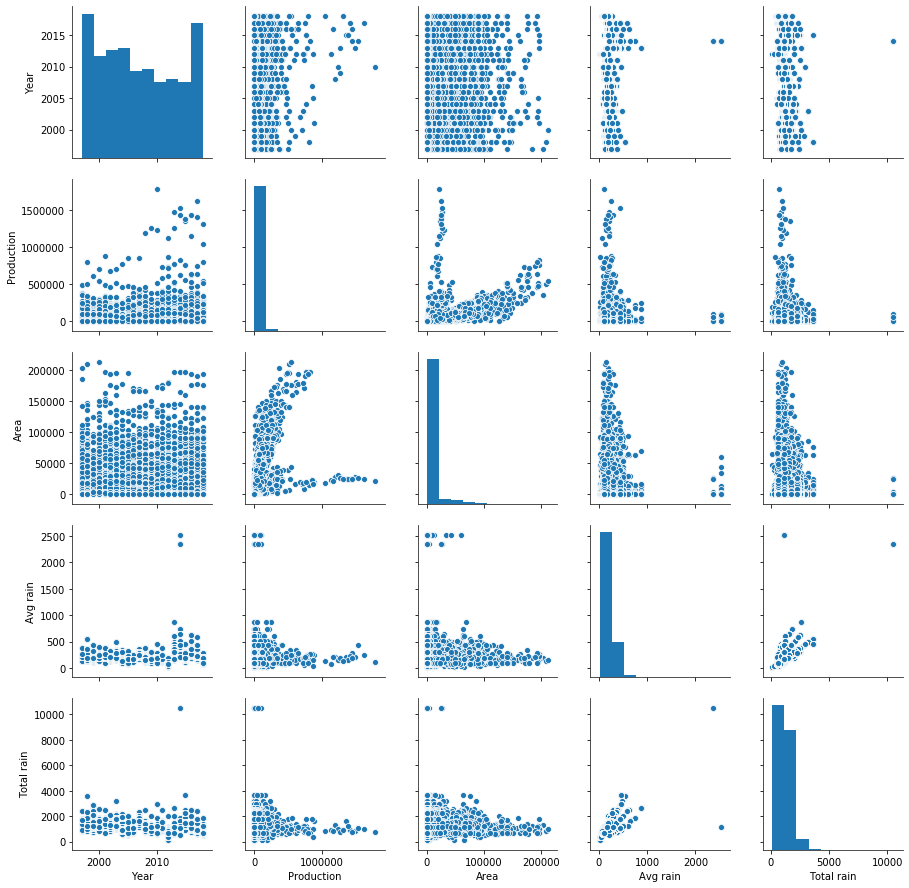

In [72]:
sns.pairplot(df_copy)


In [73]:
data_set=df_main[(df_main['Year'] >=2014)*(df_main['Year'] <=2018) ].fillna(0).groupby(['Year','Production']).agg('mean').reset_index()
# data_set.head()

In [74]:
data_set1=df_copy[(df_copy['Year'] >=2014)*(df_copy['Year'] <=2018) ].fillna(0).groupby(['Year','Production']).agg('mean').reset_index()
# data_set.head()

In [75]:
vals = data_set.corr()
vals

,Year,Production,Area,Avg rain,Total rain,N,OC,P,K,Zn,Fe,Cu,Mn,B,S
Year,1.000000,-0.002180,-0.017616,-0.424039,-0.292543,-0.001183,-0.002178,0.012549,-0.000662,-0.003214,0.001720,0.001371,-0.000094,-0.009083,-0.013735
Production,-0.002180,1.000000,0.597000,-0.022251,-0.029308,0.043817,0.028610,0.014038,0.034677,-0.005703,0.050962,0.051307,0.061234,0.067047,0.073087
Area,-0.017616,0.597000,1.000000,-0.014676,-0.026365,0.044370,0.032422,0.020627,0.010399,0.021032,0.064517,0.032334,0.057881,0.082656,0.071845
Avg rain,-0.424039,-0.022251,-0.014676,1.000000,0.546427,-0.150778,-0.059282,-0.124091,-0.061877,0.123564,0.102860,0.093090,0.083874,0.024368,-0.057486
Total rain,-0.292543,-0.029308,-0.026365,0.546427,1.000000,-0.188310,-0.083646,-0.108721,-0.094111,0.087154,0.073196,0.065291,0.054638,-0.063980,-0.117949
N,-0.001183,0.043817,0.044370,-0.150778,-0.188310,1.000000,0.577020,0.312810,0.165634,0.045604,0.055267,0.122265,0.132791,0.155154,0.245800
OC,-0.002178,0.028610,0.032422,-0.059282,-0.083646,0.577020,1.000000,0.204354,0.128911,0.248669,0.097844,-0.008492,0.188183,0.284886,0.114176
P,0.012549,0.014038,0.020627,-0.124091,-0.108721,0.312810,0.204354,1.000000,-0.110222,0.449237,0.395718,0.090739,0.365630,0.492254,0.442123
K,-0.000662,0.034677,0.010399,-0.061877,-0.094111,0.165634,0.128911,-0.110222,1.000000,-0.018229,-0.216053,-0.003548,-0.078701,0.003700,-0.042952
Zn,-0.003214,-0.005703,0.021032,0.123564,0.087154,0.045604,0.248669,0.449237,-0.018229,1.000000,0.794100,0.445941,0.840198,0.622278,0.435695


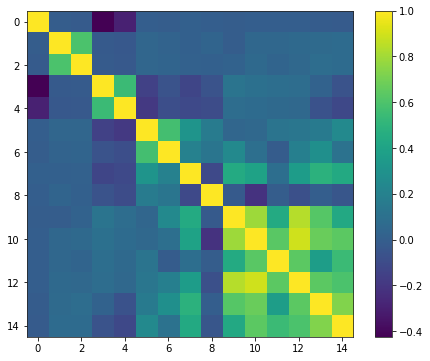

In [76]:
fig=mplot.figure(figsize=(8,6))
mplot.imshow(vals.values)
mplot.colorbar()
mplot.show()

## Linear Regression to find production rate

In [77]:
data_set2 = df_main.fillna(0).groupby(['Year']).agg('mean').reset_index()
model = LR()
X = data_set2.drop(columns = ['Production','Year'],axis=1)
y = data_set2['Production']
tou = 1
Xx = X.values[y>tou]
Yy = y.values[y>tou]
v1 = Xx.mean(axis = 0)
v2 = Xx.std(axis = 0)
Xx = Xx - v1
Xx = Xx / v2
model.fit(Xx,Yy)
yd = model.predict(X)
model.score(Xx,Yy)



0.9541980698232857

In [78]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(Yy,yd))

R2-score: -1949151.70


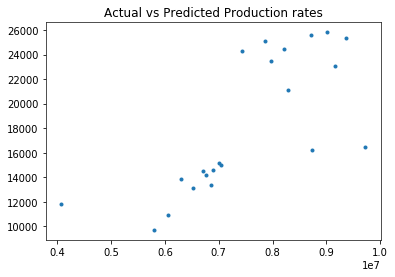

In [79]:
mplot.plot(yd,Yy,'.')
mplot.title('Actual vs Predicted Production rates')
mplot.show()

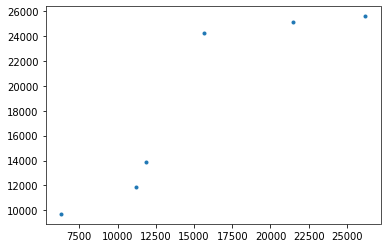

In [80]:
X=data_set2.drop(columns = ['Production','Year'],axis=1)
y=data_set2['Production']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
mplot.plot(predictions,y_test,'.')
mplot.show()

In [81]:

print("R2-score: %.2f" % r2_score(y_test,predictions))

R2-score: 0.62


In [82]:
Xx.shape

(22, 13)

## CART Method (Classification and Regression Tree)

In [83]:
model = scart(max_depth = 4)
model.fit(Xx,Yy)
model.score(Xx,Yy)

0.998208569927722

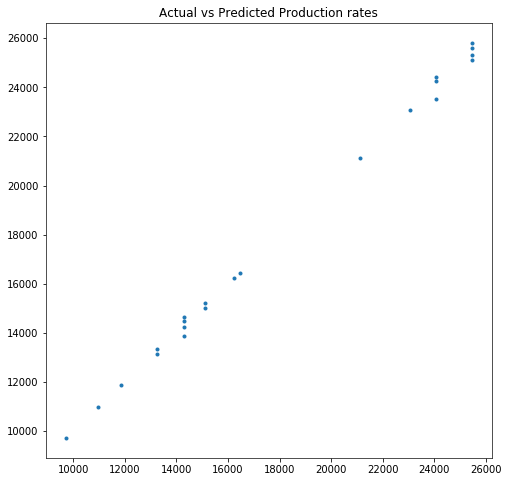

In [84]:
Yd = model.predict(Xx)
fig = mplot.figure(figsize=(8,8))
mplot.plot(Yd,Yy,'.')
mplot.title('Actual vs Predicted Production rates')
# mplot.savefig('Figures/suicide_pred_cart_model')
mplot.show()

In [85]:
# pip install graphviz

In [86]:
# import os
# os.environ["PATH"] += os.pathsep +'C:/Users/91812/Anaconda3/Library/bin/graphviz'

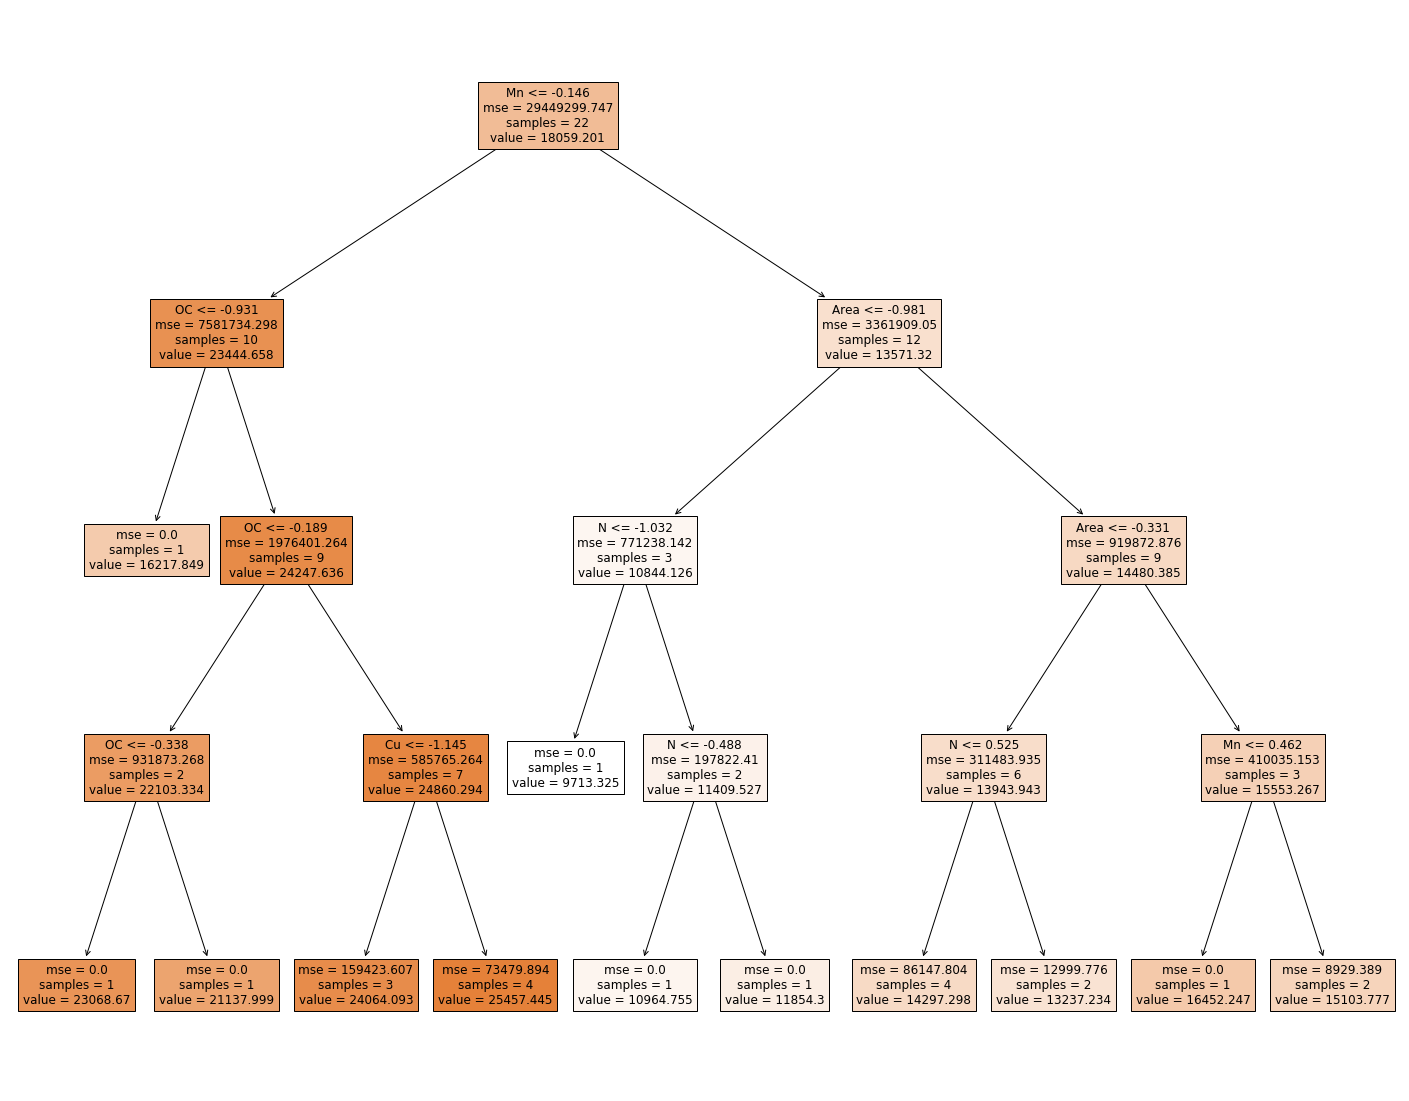

In [87]:
 from sklearn import tree
# dot_data = tree.export_graphviz(model, out_file=None,
#                                 feature_names=X.columns[:],  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data,filename = 'dtree', format = 'png')
# graph.render()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns[:],filled=True)

In [88]:
data_set = df_main.fillna(0).groupby(['CROP TYPE','Year']).agg('mean').reset_index()
dicts = {}
for crop in data_set['CROP TYPE'].unique():
    
    X = data_set[data_set['CROP TYPE'] == crop]['Year'].values.reshape(-1,1)
    Y = data_set[data_set['CROP TYPE'] == crop]['Production'].values
    if(X.shape[0] > 5):
        linmodel = LR()
        linmodel.fit(X,Y)
        w = linmodel.coef_[0]
        dicts[crop] = [w]


#### Finding the crops that have reduction in production over the years
- This will signify what crops are going be be rarely produced in future

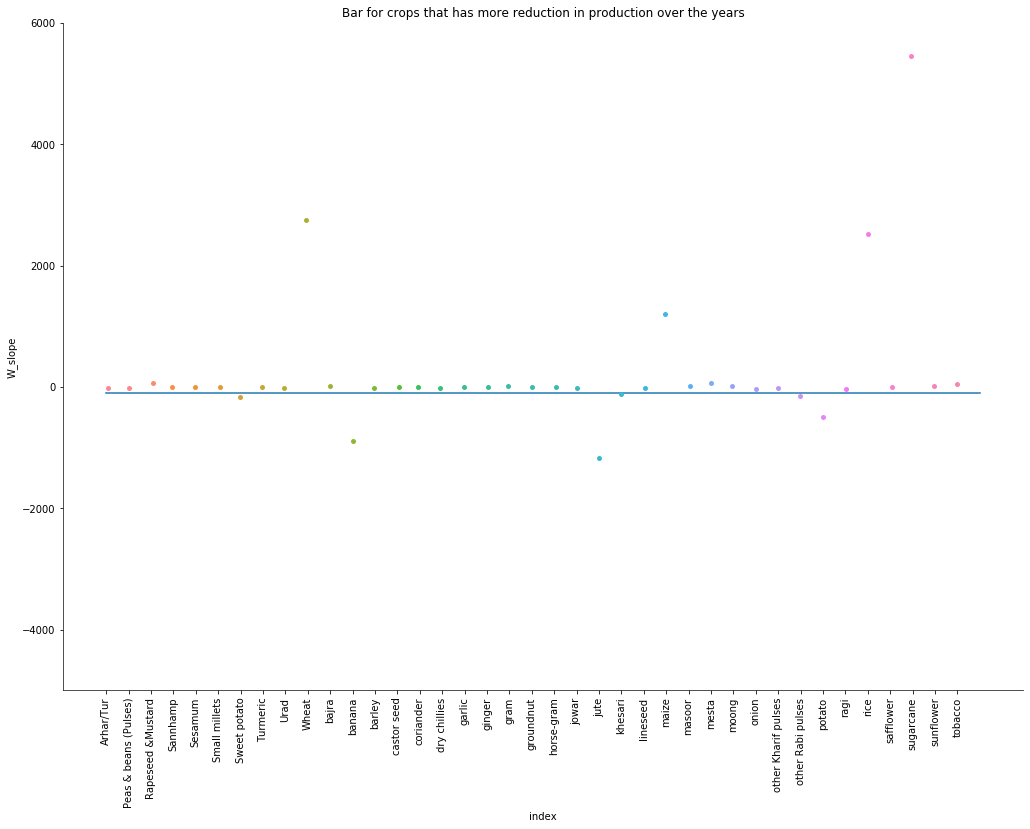

In [89]:
slope_data = pd.DataFrame(dicts).T.reset_index().rename(columns = {0:'W_slope'})
sns.catplot(x='index', y='W_slope', data = slope_data,  height=10, aspect=12/8.27);
plt.ylim(-5000,6000)
plt.xticks(rotation='vertical')
plt.plot([0,slope_data.shape[0]],[-100,-100])
plt.title('Bar for crops that has more reduction in production over the years')
# plt.savefig('Figures/Crops_reduction')
plt.show()

In [90]:
sl=slope_data[slope_data.W_slope<-100]
fig = go.Figure(data=[go.Table(
    header=dict(values=['index','W_slope'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[sl['index'],# 1st column
                    sl['W_slope']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
    ],)

fig.update_layout(width=500, height=500,title='W_slope')
fig.show()

In [91]:
state_crop = (df_main[['District','CROP TYPE','Production']])
state_crop = state_crop.groupby(['District','CROP TYPE']).agg('sum').reset_index()
state_crop = state_crop.pivot(index='District',columns = 'CROP TYPE',values = 'Production')
#Use fill na as per your choice
state_crop = state_crop.fillna(0)
state_crop.head()

CROP TYPE,Arhar/Tur,Peas & beans (Pulses),Rapeseed &Mustard,Sannhamp,Sesamum,Small millets,Sweet potato,Turmeric,Urad,Wheat,...,onion,other Kharif pulses,other Rabi pulses,potato,ragi,rice,safflower,sugarcane,sunflower,tobacco
District,,,,,,,,,,,,,,,,,,,,,
ARARIA,14345.0,12457.0,36420.0,13058.0,370.0,1249.0,96605.0,2739.0,8629.0,1920044.0,...,71922.0,8385.0,6093.0,793478.0,11766.0,3826709.0,2.0,67717.0,50913.0,77.0
AURANGABAD,27246.0,21004.0,22625.0,4.0,629.0,63.0,2628.0,30.0,172.0,2907853.0,...,39689.0,516.0,28278.0,200146.0,308.0,8371441.0,2.0,277561.0,738.0,0.0
BEGUSARAI,32698.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0
BHAGALPUR,21664.0,51340.0,261830.0,5140.0,883.0,16028.0,5270.0,2740.0,95856.0,3017463.0,...,48243.0,12499.0,10304.0,629779.0,1813.0,619647.0,113.0,3053365.0,15558.0,555.0
BHOJPUR,45047.0,25481.0,37612.0,52.0,1079.0,1600.0,1009.0,29.0,1081.0,4209408.0,...,63379.0,670.0,19714.0,678750.0,235.0,5276883.0,11.0,198233.0,0.0,0.0


In [92]:
dict1 = {}
for i,row in enumerate(state_crop.index):
#     print(i)
    dict1[row] = state_crop.columns[state_crop.iloc[i].argsort()[::-1][:10]]

In [93]:
df_main['CROP TYPE'].nunique()

40

In [94]:
pd.DataFrame(dict1).T

,0,1,2,3,4,5,6,7,8,9
ARARIA,jute,rice,maize,Wheat,potato,mesta,moong,Sweet potato,onion,sugarcane
AURANGABAD,rice,Wheat,sugarcane,masoor,khesari,potato,gram,lineseed,onion,other Rabi pulses
BEGUSARAI,banana,Arhar/Tur,tobacco,bajra,safflower,garlic,cotton,coriander,castor seed,barley
BHAGALPUR,sugarcane,Wheat,maize,potato,rice,Rapeseed &Mustard,banana,Urad,gram,Peas & beans (Pulses)
BHOJPUR,rice,Wheat,potato,sugarcane,masoor,maize,gram,khesari,onion,barley
DARBHANGA,Wheat,rice,sugarcane,maize,potato,moong,masoor,Rapeseed &Mustard,onion,ragi
GAYA,rice,Wheat,potato,sugarcane,maize,gram,masoor,onion,Arhar/Tur,moong
GOPALGANJ,sugarcane,Wheat,rice,maize,potato,Rapeseed &Mustard,Arhar/Tur,moong,onion,Sweet potato
JAMUI,rice,Wheat,sugarcane,potato,maize,onion,gram,Arhar/Tur,masoor,Rapeseed &Mustard
JEHANABAD,rice,Wheat,potato,sugarcane,khesari,masoor,maize,gram,other Rabi pulses,onion


In [95]:
from sklearn.decomposition import NMF

In [96]:
model = NMF(n_components=2, init='random', random_state=0)

In [97]:
X = state_crop.fillna(0).values

In [98]:
W = model.fit_transform(X)

In [99]:
H = model.components_

In [100]:
state_crop[:] = (np.dot(W,H))

In [101]:
state_crop

CROP TYPE,Arhar/Tur,Peas & beans (Pulses),Rapeseed &Mustard,Sannhamp,Sesamum,Small millets,Sweet potato,Turmeric,Urad,Wheat,...,onion,other Kharif pulses,other Rabi pulses,potato,ragi,rice,safflower,sugarcane,sunflower,tobacco
District,,,,,,,,,,,,,,,,,,,,,
ARARIA,20911.857645,11510.927940,49821.279719,1306.910719,1496.823425,1665.845290,21941.220872,1194.446810,9140.896062,3.039030e+06,...,61033.363740,2130.024717,15892.622008,6.019363e+05,8453.366321,4.332650e+06,100.654975,0.000000e+00,16650.870216,9523.202867
AURANGABAD,30765.215877,16934.707046,73296.330335,1922.707733,2202.104499,2450.766968,32279.599843,1757.252493,13447.951178,4.470976e+06,...,89791.382625,3133.660880,23380.990595,8.855598e+05,12436.467586,6.374131e+06,148.082112,0.000000e+00,24496.514152,14010.395299
BEGUSARAI,9.030900,4.971057,21.515592,0.564397,0.646411,0.719404,9.475436,0.515828,3.947546,1.312422e+03,...,26.357592,0.919863,6.863316,2.599495e+02,3.650632,1.871079e+03,0.043468,0.000000e+00,7.190769,4.112647
BHAGALPUR,14162.627152,6555.240484,33385.799153,711.198124,646.629495,2090.759765,13979.115048,768.026613,5263.123214,1.947114e+06,...,31275.082046,1080.603820,7347.899553,3.354231e+05,5179.166671,1.920929e+06,98.534290,3.325531e+06,6070.815099,6485.417495
BHOJPUR,24959.814114,13631.207288,59434.345749,1544.763881,1754.633050,2072.039839,26111.825725,1422.099302,10829.630280,3.617640e+06,...,71972.616490,2510.851406,18671.885250,7.121703e+05,10042.215726,5.083178e+06,122.780471,2.892876e+05,19421.144251,11369.745059
DARBHANGA,14417.439519,7487.740379,34220.111827,838.183920,899.300178,1496.361443,14808.859795,808.710595,5966.863691,2.055081e+06,...,38443.135803,1337.709849,9722.668077,3.888908e+05,5630.789420,2.620869e+06,80.369276,1.201827e+06,9598.317532,6578.598963
GAYA,20156.053229,10849.884058,47950.343397,1225.328588,1370.223151,1795.741749,20974.285521,1143.195697,8627.326768,2.907254e+06,...,56840.644420,1981.553504,14643.682333,5.659135e+05,8040.026241,3.975918e+06,103.014174,6.567869e+05,15020.882990,9186.081204
GOPALGANJ,38758.195933,13980.451307,90229.799879,1391.309406,598.100059,8793.441195,35445.619011,1971.247871,11443.215413,4.974095e+06,...,53485.300474,1802.129240,9209.198185,6.874010e+05,12431.471538,2.023003e+06,366.557203,1.971338e+07,0.000000,17862.569907
JAMUI,6844.152187,3544.525970,16241.876997,396.494607,423.949299,718.105710,7022.862389,383.575799,2825.069613,9.746787e+05,...,18168.341485,632.109685,4587.936421,1.840291e+05,2668.608769,1.235989e+06,38.397265,5.973431e+05,4514.464673,3123.237973


In [102]:
dict1 = {}
for i,row in enumerate(state_crop.index):
#     print(i)
    dict1[row] = state_crop.columns[state_crop.iloc[i].argsort()][::-1][:10]

### Recommended crops

In [103]:
rec_crop=pd.DataFrame(dict1).T.reset_index()
rec_crop.columns=['District',1,2,3,4,5,6,7,8,9,10]

fig = go.Figure(data=[go.Table(
    header=dict(values=['District',1,2,3,4,5,6,7,8,9,10],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[rec_crop['District'],# 1st column
                    rec_crop[1],rec_crop[2],rec_crop[3],rec_crop[4],rec_crop[5],rec_crop[6],rec_crop[7],rec_crop[8],rec_crop[9],rec_crop[10]], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
    ],)

fig.update_layout(width=1000, height=1000,title='Recommended Crops')
fig.show()

In [104]:
# for_cluster = merged_all[['Crop', 'Area', 'Production', 'Annual_Rain','Avg_Temperature', 'Price', 'Cost_per_Hectare', 'Cost_per_quintal','Suicides']]
for_cluster = df_main.drop('Year',axis=1).groupby(['CROP TYPE']).agg('mean').reset_index()
# for_cluster = for_cluster.drop(28)
for_cluster.iloc[:,1:4]

,Production,Area,Avg rain
0,1001.905158,721.760399,212.680532
1,576.885563,594.397887,216.688380
2,2423.823988,2230.334891,216.632399
3,128.246667,94.150000,205.010000
4,79.185263,106.202105,222.690526
5,212.431755,287.077994,210.596100
6,2520.476015,191.527675,210.018450
7,149.295276,146.476378,227.633858
8,589.051852,744.438889,217.555556
9,124880.051447,55857.633441,215.273312


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

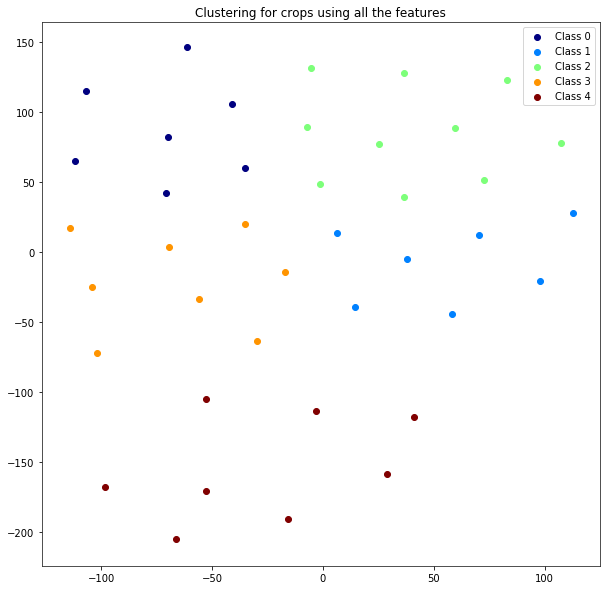

In [105]:
# clustering of crops
X = TSNE(n_components=2).fit_transform(for_cluster.iloc[:,1:4])
k=5
kmeans = km(n_clusters=k, random_state=0).fit(X)

y = kmeans.labels_
list(set(y))
N= len(list(set(y)))
cmap = mplot.cm.jet
colors = cmap(np.linspace(0, 1, N))
fig = mplot.figure(figsize=(10,10))
for i in list(set(y)):
    mplot.scatter(X[y==i,0],X[y==i,1],c=colors[i],label=str('Class '+str(i)))
mplot.legend()
mplot.title('Clustering for crops using all the features')
# mplot.xlim(-15,)
# mplot.ylim(-20,)
mplot.show()

In [106]:
for i in range(k):
    print('Cluster ',i,list(set(for_cluster['CROP TYPE'][y==i].values)),'\n')

Cluster  0 ['Sesamum', 'moong', 'Peas & beans (Pulses)', 'sunflower', 'khesari', 'castor seed', 'Small millets'] 

Cluster  1 ['Turmeric', 'horse-gram', 'groundnut', 'cotton', 'bajra', 'safflower', 'ragi'] 

Cluster  2 ['other Kharif pulses', 'Urad', 'dry chillies', 'Sannhamp', 'ginger', 'barley', 'garlic', 'lineseed', 'coriander', 'Arhar/Tur'] 

Cluster  3 ['jowar', 'Rapeseed &Mustard', 'tobacco', 'gram', 'masoor', 'Sweet potato', 'onion', 'other Rabi pulses'] 

Cluster  4 ['mesta', 'sugarcane', 'rice', 'maize', 'Wheat', 'potato', 'banana', 'jute'] 



In [107]:
# print(merged_all.columns)
# from sklearn.cluster import AgglomerativeClustering

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

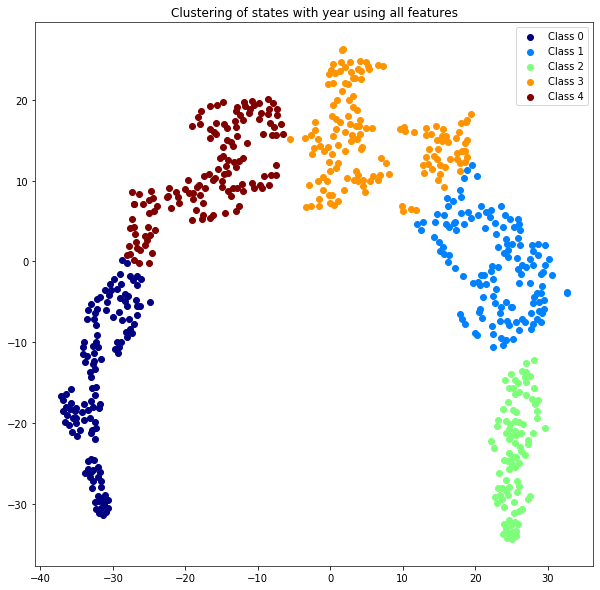

In [108]:
# for_cluster = merged_all[['STATES','YEAR', 'Area', 'Production', 'Annual_Rain','Avg_Temperature', 'Price', 'Cost_per_Hectare', 'Cost_per_quintal','Suicides']]
for_cluster = df_main.groupby(['District','Year']).agg('mean').reset_index()
for_cluster.head()
X = TSNE(n_components=2).fit_transform(for_cluster.iloc[:,1:4])
# k=4
# kmeans = km(n_clusters=k, random_state=0).fit(X)
# y = kmeans.labels_
clustering = km(n_clusters=5).fit(X)
y=clustering.labels_
list(set(y))
N= len(list(set(y)))
cmap = mplot.cm.jet
colors = cmap(np.linspace(0, 1, N))
fig = mplot.figure(figsize=(10,10))
for i in list(set(y)):
    mplot.scatter(X[y==i,0],X[y==i,1],c=colors[i],label=str('Class '+str(i)))
mplot.legend()
mplot.title('Clustering of states with year using all features')
mplot.show()


In [109]:
#### Crops falling in same cluster
for i in range(k):
    print('Cluster ',i,list(set(for_cluster['District'][y==i].values)),'\n')

Cluster  0 ['GAYA', 'BHOJPUR', 'AURANGABAD', 'PURNIA', 'SAMASTIPUR', 'SIWAN', 'SITAMARHI', 'ROHTAS', 'SAHARSA', 'GOPALGANJ', 'KATIHAR', 'MADHEPURA', 'NALANDA', 'SUPAUL', 'MUZAFFARPUR', 'ARARIA', 'PATNA'] 

Cluster  1 ['JAMUI', 'PATNA', 'BHOJPUR', 'AURANGABAD', 'SAMASTIPUR', 'SHEIKHPURA', 'KISHANGANJ', 'BEGUSARAI', 'KHAGARIA', 'NALANDA', 'MADHUBANI', 'DARBHANGA', 'SAHARSA', 'NAWADA', 'MUZAFFARPUR', 'JEHANABAD', 'GAYA', 'BHAGALPUR', 'VAISHALI', 'SITAMARHI', 'MADHEPURA'] 

Cluster  2 ['GAYA', 'BHAGALPUR', 'SHEIKHPURA', 'BEGUSARAI', 'KHAGARIA', 'MUNGER', 'NAWADA', 'JAMUI', 'JEHANABAD'] 

Cluster  3 ['LAKHISARAI', 'ROHTAS', 'JAMUI', 'PATNA', 'BHOJPUR', 'AURANGABAD', 'SAMASTIPUR', 'SHEIKHPURA', 'KISHANGANJ', 'BEGUSARAI', 'KHAGARIA', 'KATIHAR', 'NALANDA', 'MADHUBANI', 'DARBHANGA', 'SIWAN', 'SAHARSA', 'NAWADA', 'MUZAFFARPUR', 'ARARIA', 'JEHANABAD', 'GAYA', 'BHAGALPUR', 'PURNIA', 'VAISHALI', 'SITAMARHI', 'GOPALGANJ', 'SUPAUL', 'MADHEPURA'] 

Cluster  4 ['LAKHISARAI', 'ROHTAS', 'JAMUI', 'PATNA',

In [110]:
#polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

Polynomial regression
$$y = b + \theta_1  x + \theta_2 x^2$$

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 

so we can use **LinearRegression()** function to solve it:


In [111]:
data_set = df_main.fillna(0).groupby(['CROP TYPE','Year']).agg('mean').reset_index()
y_pred=[]
y_testing=[]
score=[]
for crop in data_set['CROP TYPE'].unique():
    
    temp1 = data_set[data_set['CROP TYPE'] == crop]['Year'].values.reshape(-1,1)
    X=np.array([i for i in range(len(temp1))]).reshape(-1, 1)
    y = data_set[data_set['CROP TYPE'] == crop]['Production'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    poly=PolynomialFeatures(degree=2)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)
#     poly_future_forecast=poly.fit_transform(future_forecast)

    lm=LinearRegression(normalize=True, fit_intercept=False)
    lm.fit(poly_X_train,y_train)
    test_linear_pred = lm.predict(poly_X_test)
    temp2={'R2-score':"%.2f" % r2_score(y_test,test_linear_pred),'crop':crop}
    score.append(temp2)
#     print("R2-score: %.2f" % r2_score(test_linear_pred,y_test)+crop)
    y_testing.append(y_test)
    y_pred.append(test_linear_pred)
y_testing=np.vstack(y_testing)
y_pred=np.vstack(y_pred)
score=pd.DataFrame(score)
#     linear_pred = lm.predict(poly_future_forecast)
#     print('MAE:', mean_absolute_error(test_linear_pred, y_test))
#     print('MSE:',mean_squared_error(test_linear_pred, y_test))

In [112]:
score['R2-score']=score['R2-score'].astype(float)

In [113]:
score[score['R2-score']>0.6]

,R2-score,crop
6,0.69,Sweet potato
12,0.71,barley
20,0.77,groundnut
24,0.63,khesari
26,0.87,maize
34,0.90,ragi
37,0.74,sugarcane
38,0.73,sunflower
39,0.66,tobacco


In [114]:
temp3=score[score['R2-score']>0.6]
fig = go.Figure(data=[go.Table(
    header=dict(values=['R2-score','crop'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[temp3['R2-score'],# 1st column
                    temp3['crop']], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
    ],)

fig.update_layout(width=500, height=500,title='R2-score')
fig.show()

In [115]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_testing,y_pred))
lm.score(poly_X_train,y_train)

R2-score: 0.91


0.6554309788704424

Text(0.5, 1.0, 'Actual vs Predicted Production rates for Polynomial regression')

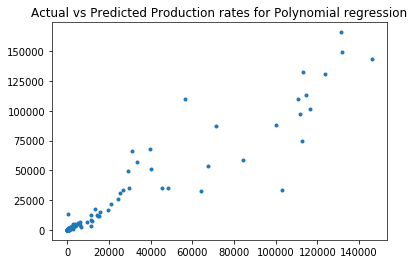

In [116]:
mplot.plot(y_pred,y_testing,'.')
mplot.title('Actual vs Predicted Production rates for Polynomial regression')


In [117]:
data_set=df_main.fillna(0).groupby(['Year','Production']).agg('mean').reset_index()
X = data_set.drop(columns=['Production','Year'],axis=1)
y = data_set['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly=PolynomialFeatures(degree=2)
poly_X_train=poly.fit_transform(X_train)
poly_X_test=poly.fit_transform(X_test)
#     poly_future_forecast=poly.fit_transform(future_forecast)

lm=LinearRegression(normalize=True, fit_intercept=False)
lm.fit(poly_X_train,y_train)
test_linear_pred = lm.predict(poly_X_test)

In [118]:
lm.intercept_

0.0

In [119]:
print("R2-score: %.2f" % r2_score(y_test,test_linear_pred) )

R2-score: 0.45


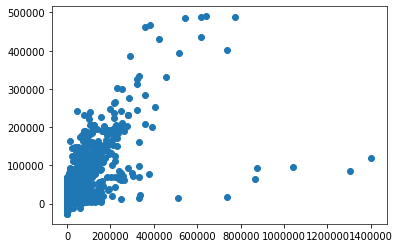

In [120]:
plt.scatter(y_test,test_linear_pred)

<img href="IQR_outlier">
    